
**Baseball Case Study Problem Statement**: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

Importing Librabries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MrTanbirSingh/googleColab/main/basketball.csv', index_col=[0])

**Understanding the columns**




**W – Win**: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
</br>
**R – Runs scored**: times reached home plate legally and safely
</br>
**AB – At bat**: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
</br>
**H – Hit**: reaching base because of a batted, fair ball without error by the defense
</br>
**2B – Double**: hits on which the batter reaches second base safely without the contribution of a fielding error
</br>
**3B – Triple**: hits on which the batter reaches third base safely without the contribution of a fielding error
</br>
**HR – At bats per home run**: at bats divided by home runs
</br>
**BB – Base on balls (also called a "walk")**: hitter not swinging at four pitches called out of the strike zone and awarded first base.
</br>
**K (or SO) – Strikeout**: number of batters who received strike three
</br>
**SB – Stolen base**: number of bases advanced by the runner while the ball is in the possession of the defense
</br>
**RA – Run average**: number of runs allowed times nine divided by innings pitched
</br>
**ER – Earned run**: number of runs that did not occur as a result of errors or passed balls
</br>
**ERA – Earned run average**: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
</br>
**CG – Complete game**: number of games where player was the only pitcher for their team
</br>
**SHO – Shutout**: number of complete games pitched with no runs allowed.
A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score.
</br>
**SV – Save**: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
</br>
**E – Errors**: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

The data we are dealing with is **continous data**

# **Understanding Data**

#### Size of the Data

In [4]:
df.shape

(30, 17)

#### How data looks like


In [5]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94


used sample(5) function to see 5 random row from the data set.

#### What is the data type of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


Data shows that all the columns are of integer data type except df['ERA'] 
column which is float. No categorical data which mean encoding on this data is not required and we can also see that how much memory is being used by the data.

#### Checking null values

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

This data does not have null values.

#### How does the data look mathematically

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


describe() function allows us to view data mathematically. Data is showing us that the average win percentage is 80.9 and the minimum WIN percentage is 63

#### Checking for Duplicate values

In [9]:
df.duplicated().sum()

0

Data set does not have any duplicate values. It always better to remove duplicate to avoid wrong predictions

#### How is the correlation between columns

In [10]:
df.corr()['W'].sort_values(ascending = False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Correlation of other columns with **'W: Win'** columns shows that the if **'SV: Save'** is increasing 'W: Win' are also increasing(High +ve correlation)
</br>
</br>
Where if **'ERA: Earned Run Average'** is increading the number of **'W: Win'** are highly decreasing(Strong -ve correlation)
</br>
</br>
While observing the correlation between the columns, I can see that **[CG, H, AB, E]** columns are showing the least correlation among other columns which is between **+/- 0.9**. These columns are of less use for the model.


# Exploratory Data Analysis

In [11]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


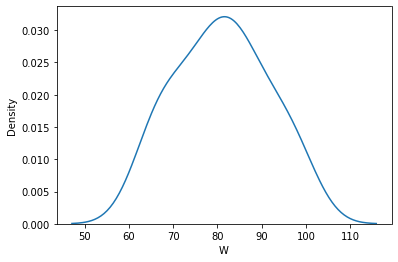

In [12]:
sns.distplot(df['W'], bins = 12, hist = False)

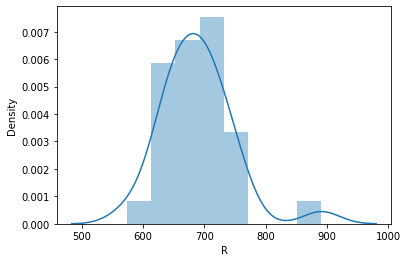

In [13]:
sns.distplot(df['R'])

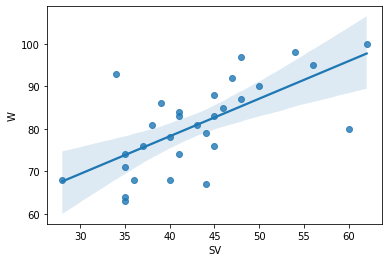

In [14]:
sns.regplot(x = df['SV'], y = df['W'],scatter=True)

it is showing linear relationship between Win and Save

checking distribution, outliers, correlation and grouping these plots.

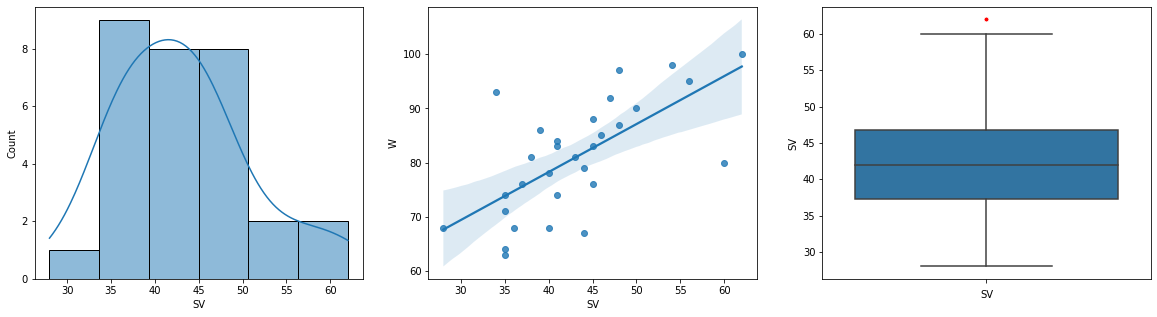

Skewness:  0.658
Correlation:  0.667


In [15]:
def graph(df,col):
  
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.histplot(x=col,data=df,kde=True)

  plt.subplot(1,3,2)
  sns.regplot(x=col,y='W',data=df,scatter=True)
  
  plt.subplot(1,3,3)
  sns.boxplot(y=df[col],data=df, flierprops = dict(markerfacecolor='red', marker = 'o', markeredgecolor = 'white'))
  plt.xlabel(col)
  plt.show()
  print('Skewness: ',round(df[col].skew(),3))
  print('Correlation: ',round(df.corr()['W'][col],3))

graph(df=df, col= 'SV')


**SV** is positively skewed, linear correlation is present in this SAVE column.
</br>
Boxplot shows that there are few outliers

**Visualising data from positively correlated columns towards negatively correlated columns**

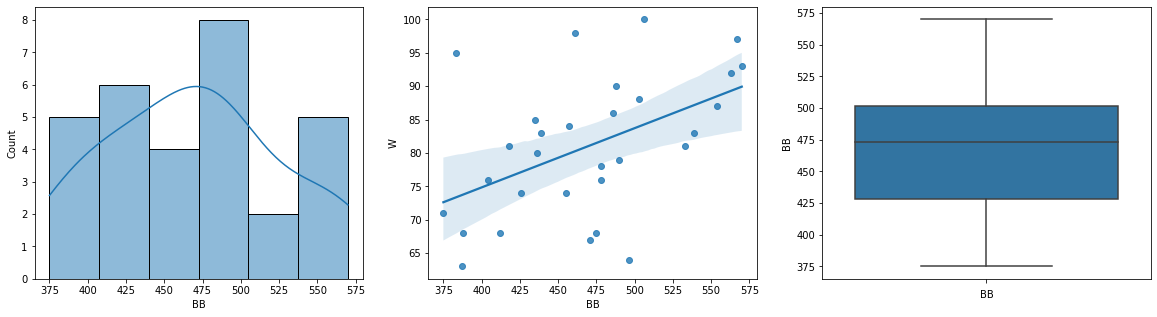

Skewness:  0.158
Correlation:  0.484


In [16]:
graph(df=df, col= 'BB')

correlation is present with no outliers and the data is positively skewed.

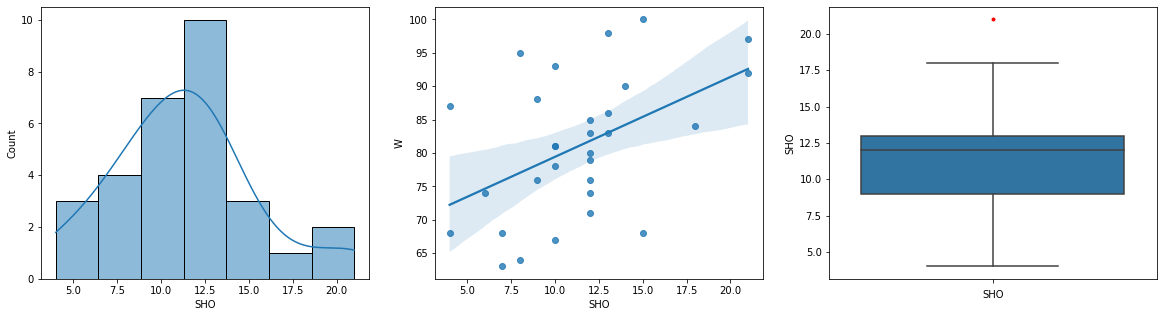

Skewness:  0.566
Correlation:  0.472


In [17]:
graph(df=df, col= 'SHO')


**SHO: Shutout** is highly correlated with Wins and it is right skewed. outliers are present in the dataset.

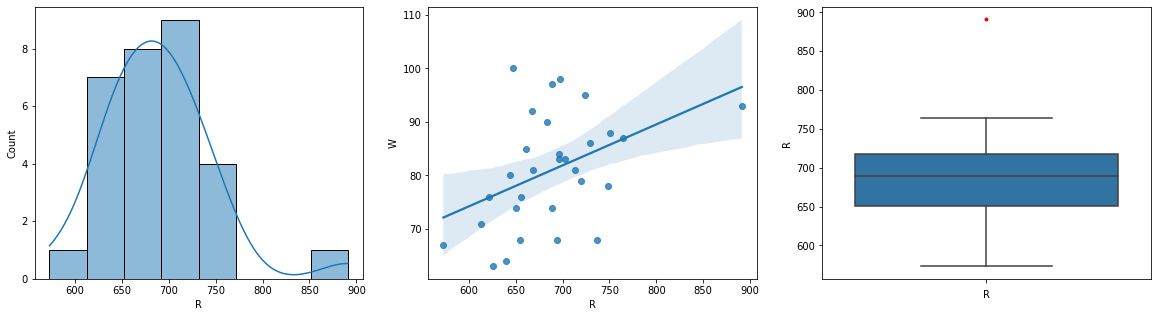

Skewness:  1.201
Correlation:  0.431


In [18]:
graph(df=df, col= 'R')

**Runs Scored** is highly correlated with **Wins** and it is right skewed.Outliers are present between 800 and 900.

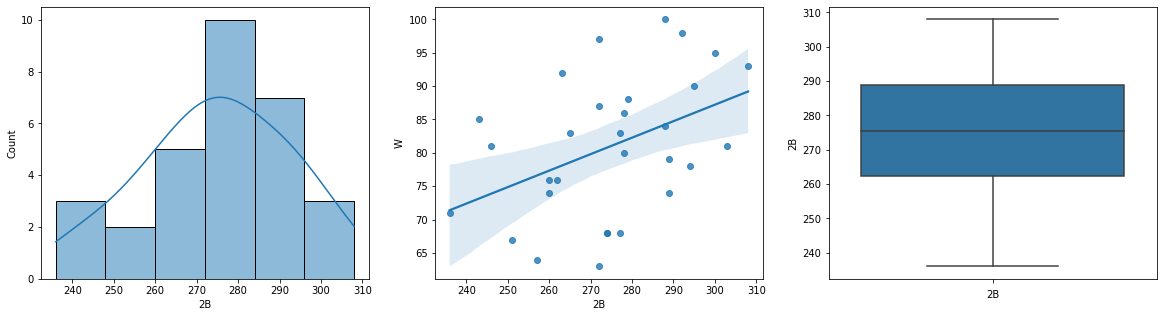

Skewness:  -0.231
Correlation:  0.428


In [19]:
graph(df=df, col= '2B')

This is left skewed with no outliers. **2B** has correlation with **W**

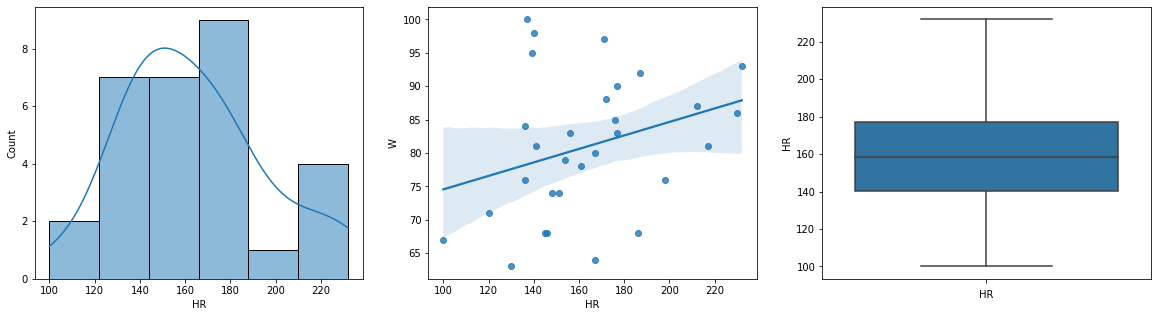

Skewness:  0.516
Correlation:  0.307


In [20]:
graph(df=df, col= 'HR')

Outliers are not present and scatter plot is showing that the correlated to W.

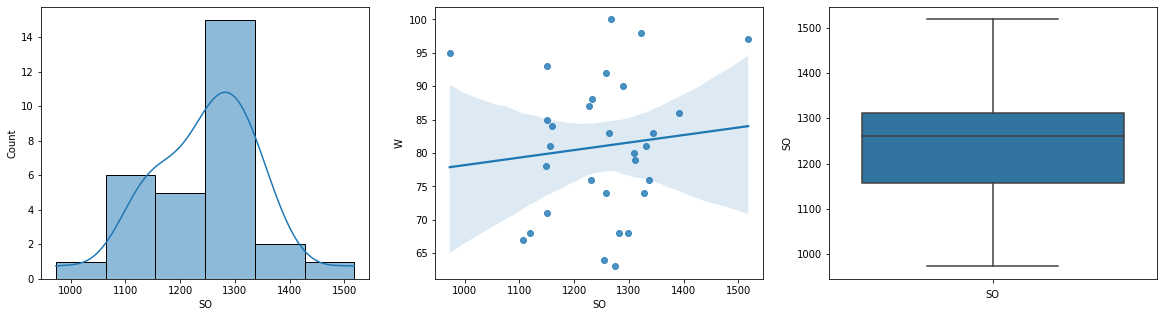

Skewness:  -0.156
Correlation:  0.112


In [21]:
graph(df=df, col= 'SO')

left skewness is present in the data along with weak correlation without any outliers

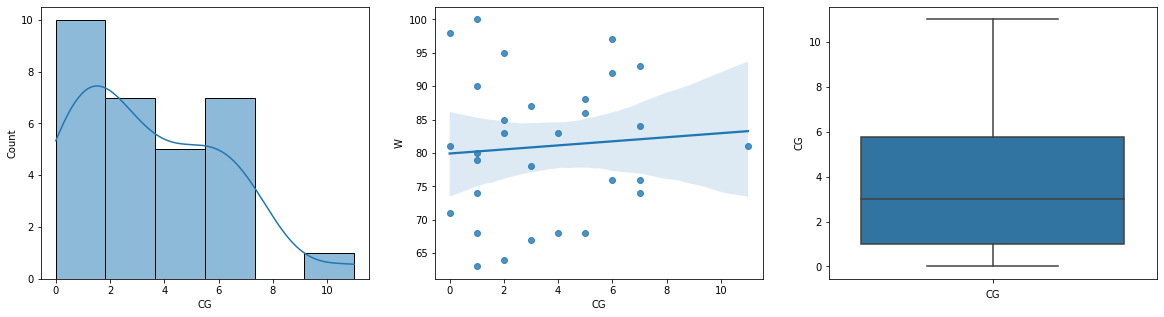

Skewness:  0.737
Correlation:  0.081


In [22]:
graph(df=df, col= 'CG')

CG is right skewed with poor correlation without any outliers.

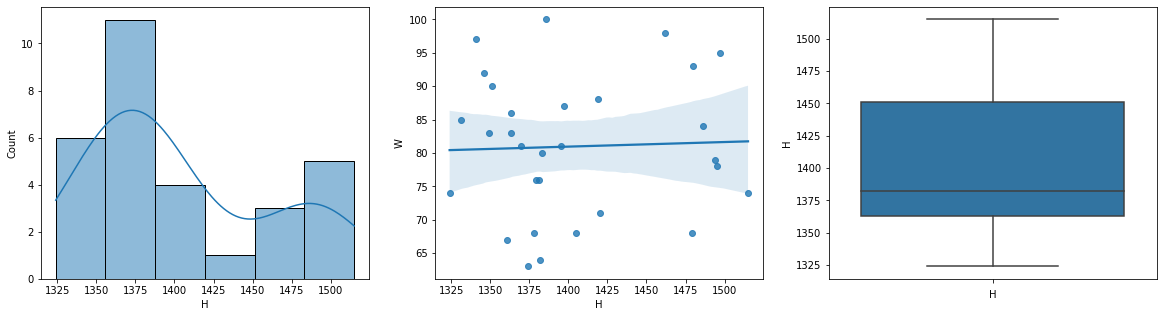

Skewness:  0.67
Correlation:  0.038


In [23]:
graph(df=df, col= 'H')

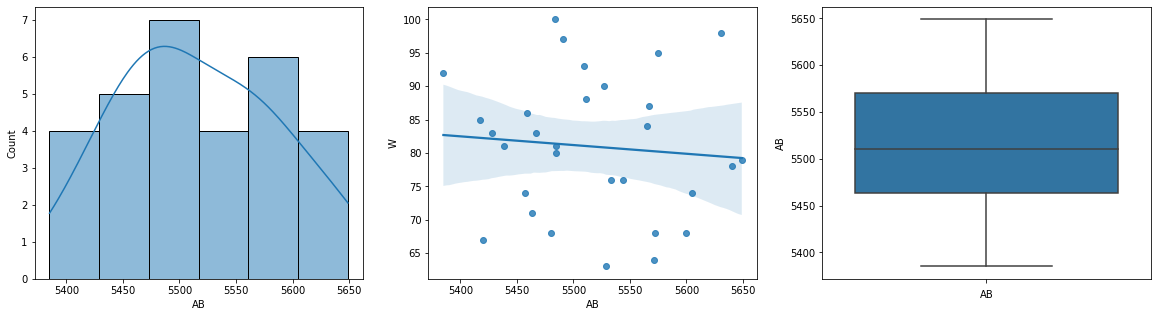

Skewness:  0.183
Correlation:  -0.088


In [24]:
graph(df=df, col= 'AB')

**AB: At bat** is showing poor correlation with the Win. Outliers are not present in the dataset.

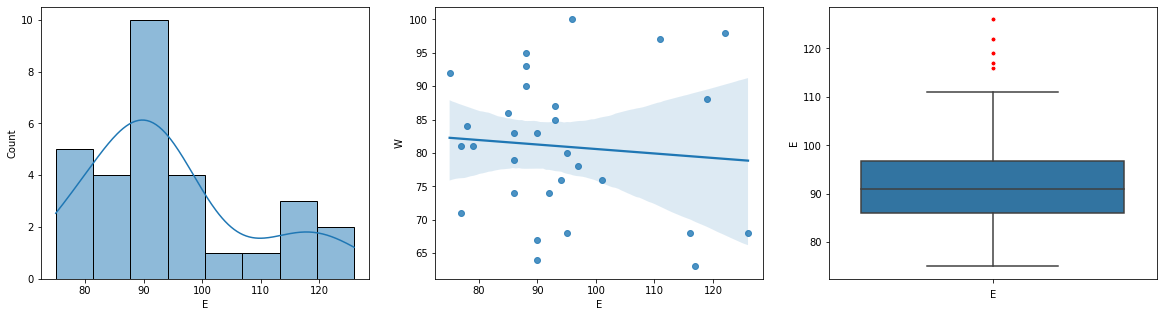

Skewness:  0.89
Correlation:  -0.089


In [25]:
graph(df=df, col= 'E')

**E: Errors** is not correlated with Win and the numer of outliers are very high. This data set is right skewed

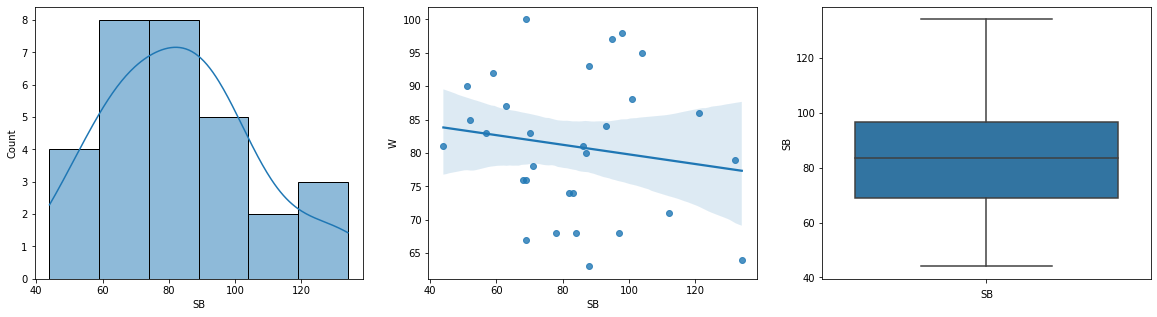

Skewness:  0.48
Correlation:  -0.157


In [26]:
graph(df=df, col= 'SB')

**SB: Stolen base** is barely correlate with the target data Win. Outliers are not present in the dataset and SB is right skewed.

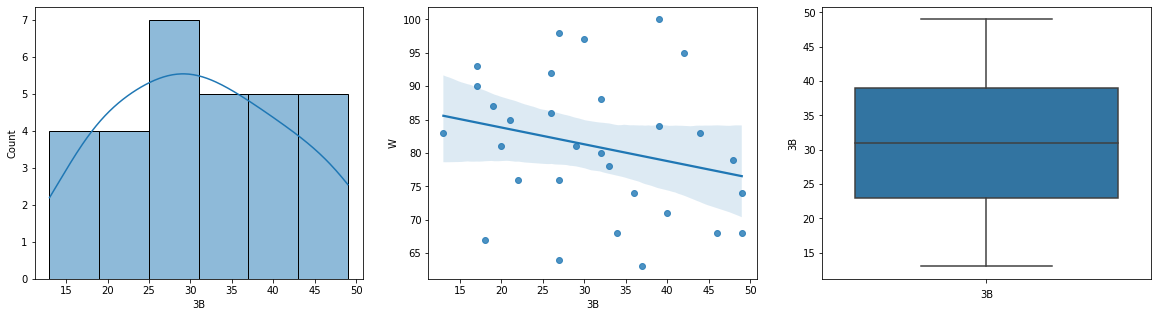

Skewness:  0.13
Correlation:  -0.251


In [27]:
graph(df=df, col= '3B')

**3B: Triple** has very weak negative correlations with win with no outlier and data is right-skewed

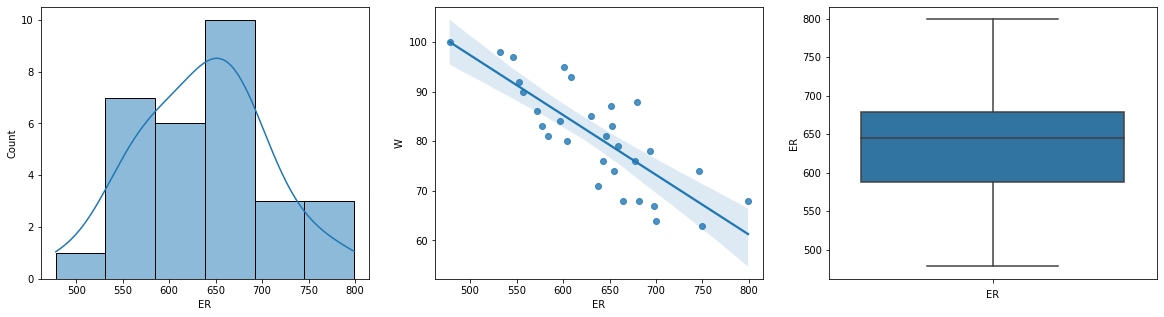

Skewness:  0.059
Correlation:  -0.809


In [28]:
graph(df=df, col= 'ER')

**ER: Earned Run** is hugely correlated with the Wins. Skewness is minimal without any outlier.

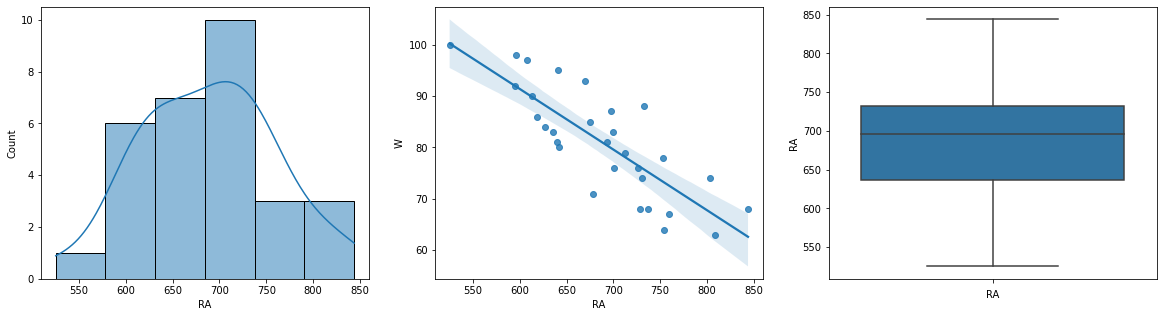

Skewness:  0.046
Correlation:  -0.813


In [29]:
graph(df=df, col= 'RA')

**RA: Run Average** is highly correlated with the Win. outliers in this dataset is not present. Skewness of this dataset is very low.

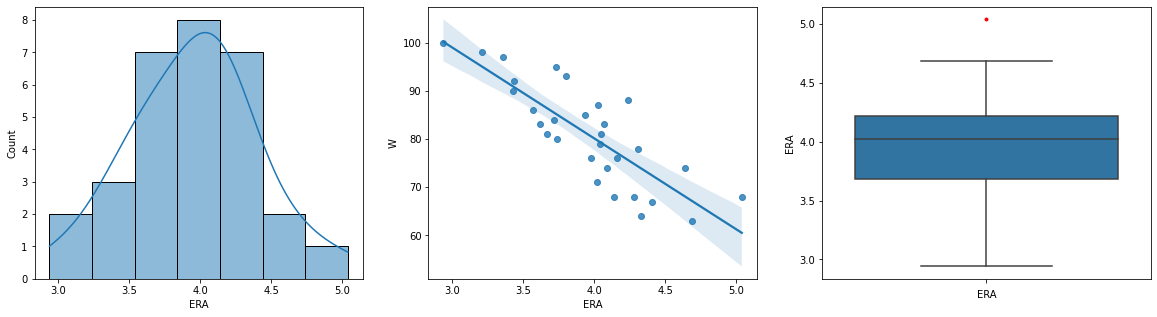

Skewness:  0.053
Correlation:  -0.82


In [30]:
graph(df=df, col= 'ERA')

**ERA: Earned Run Average** is highly correlated with the Win and it is left skewed. Outliers are present in the dataset.

ER:Earned Run, RA:Run Average, ERA:Earned run Average is highly negatively correlated.
</br></br>
SV:Save, BB:Base on balls, SHO:Shutout, R:Runs and 2B:Double is highly positively correlated</br></br>
Linear Relationship is not seen in other columns.

Outliers are present in ['ERA', 'E', 'R', 'SHO', 'SV'] columns which need to be addressed along with skewness. This is continous data, needs to be scaled and transformed as well.
</br>
E: Errors have the almost 0 correlation with Win.

# Feature Engineering

##### Removing Skewness

In [31]:
from scipy.stats import boxcox

df_no_skew = df.copy()
for i in ['R', 'E', 'CG', 'SV', 'HR']:
  try:
    df_no_skew[i] = boxcox(df[i], 0) #0 means log transformaion and 0.5 means squareRoot transtormation.
  except:
    df_no_skew[i] = np.log(df[i])

df_no_skew['CG'] = df_no_skew['CG'].replace(float("-inf"),0)

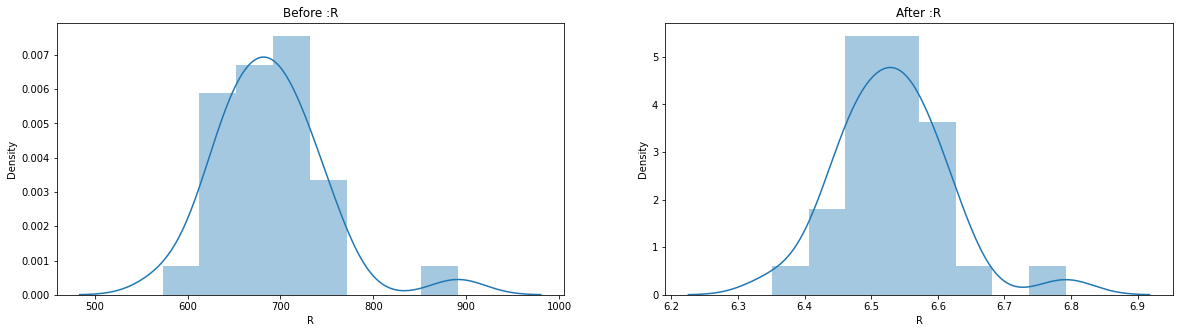

Skewness:  1.2007863569707353 After removing skewness:  0.7441956366104983


In [32]:
def plot(col):
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.distplot(df[col])
  plt.title('Before :'+col)

  plt.subplot(1,2,2)
  sns.distplot(df_no_skew[col])
  plt.title('After :'+col)
  plt.show()

  print('Skewness: ',df[col].skew(),'After removing skewness: ',df_no_skew[col].skew())
plot(col= 'R')

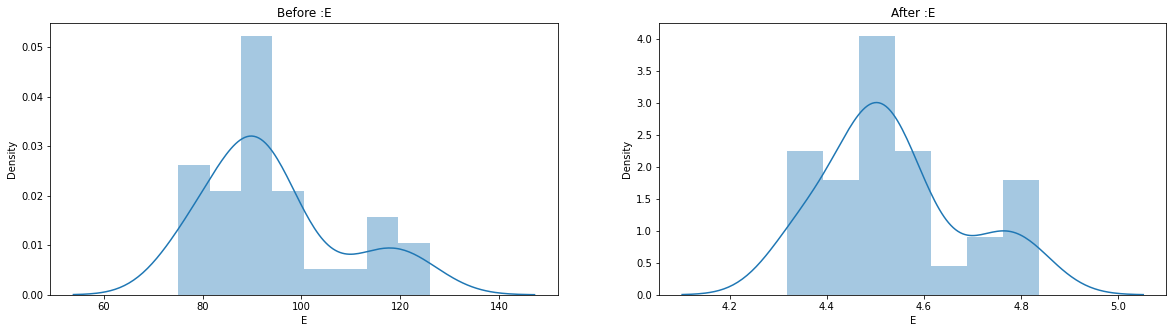

Skewness:  0.8901318267689016 After removing skewness:  0.6300804690891397


In [33]:
plot(col= 'E')

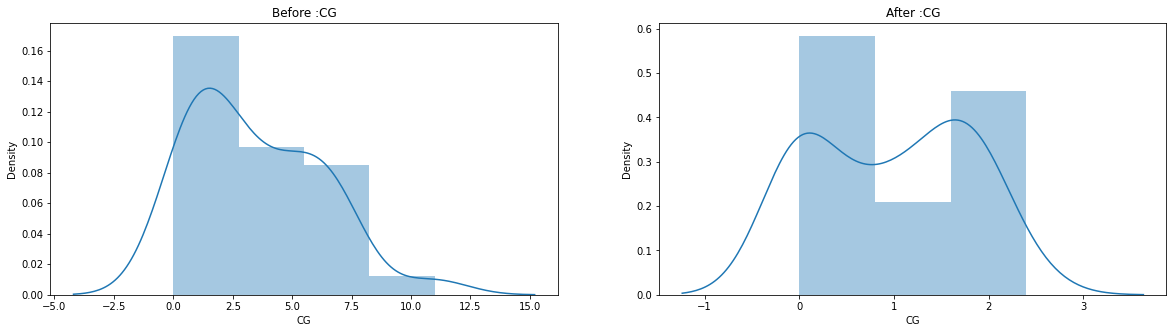

Skewness:  0.7368452725826206 After removing skewness:  -0.015416851230982933


In [34]:
plot(col= 'CG')

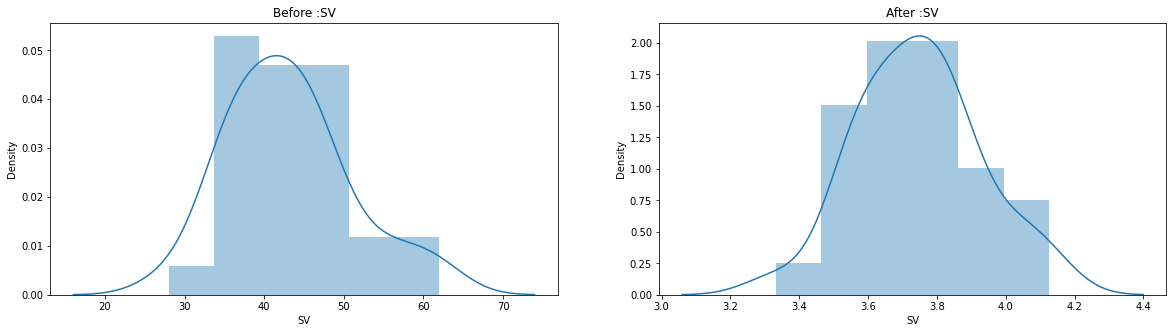

Skewness:  0.6575235461553925 After removing skewness:  0.15058249970623516


In [35]:
plot(col= 'SV')

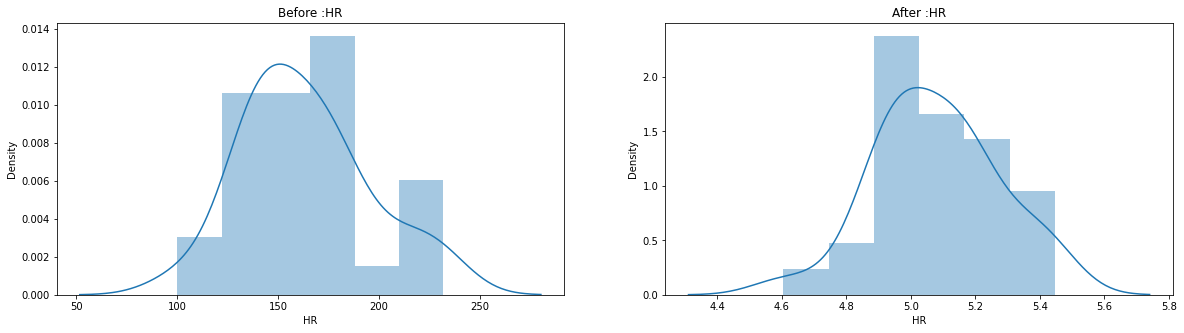

Skewness:  0.5164407366297173 After removing skewness:  -0.01335071539600772


In [36]:
plot(col= 'HR')

#### Removing outliers

##### **Using Z-score**

In [37]:
from scipy.stats import zscore
import numpy as np 

z = np.abs(zscore(df_no_skew))

#df_without_outliers
df_no_out = df_no_skew[(z<3).all(axis=1)]
print(df_no_out.shape)
print(df.shape)


(29, 17)
(30, 17)


Percentage of data loss

In [38]:
(30-29)/30*100

3.3333333333333335

**Ploting graphs after removing outliers**

In [39]:
def outliers(col):
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.boxplot(y =df[col])
  plt.title('Before :'+col)

  plt.subplot(1,2,2)
  sns.boxplot(y =df_no_out[col])
  plt.title('After :'+col)
  plt.show()
# outliers(col = 'E')

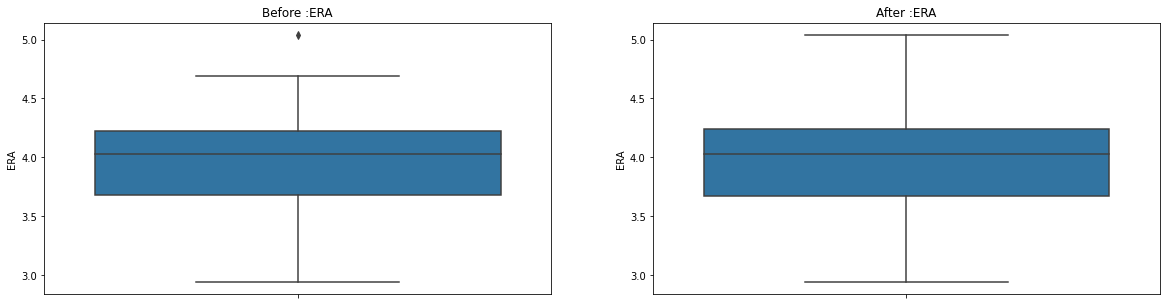

In [40]:
outliers(col = 'ERA')

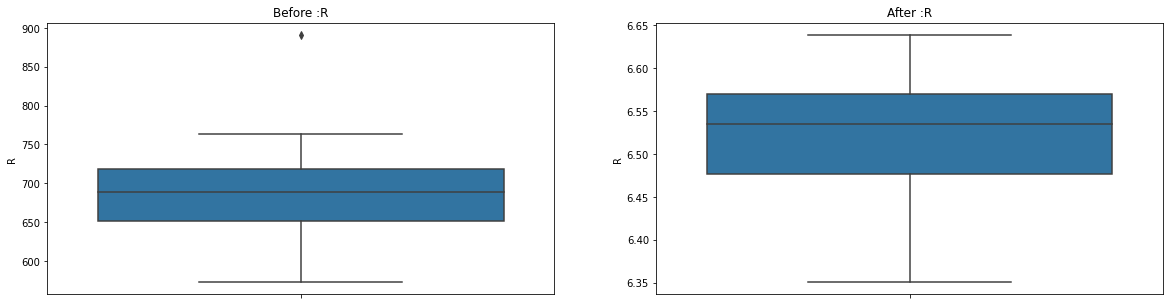

In [41]:
outliers(col = 'R')

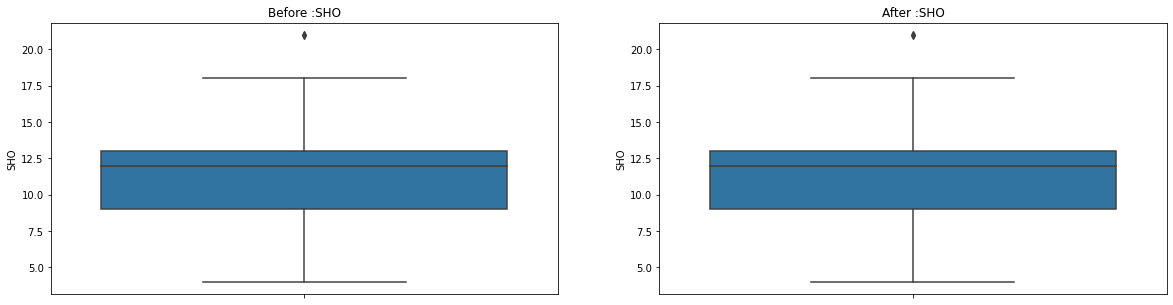

In [42]:
outliers(col = 'SHO')

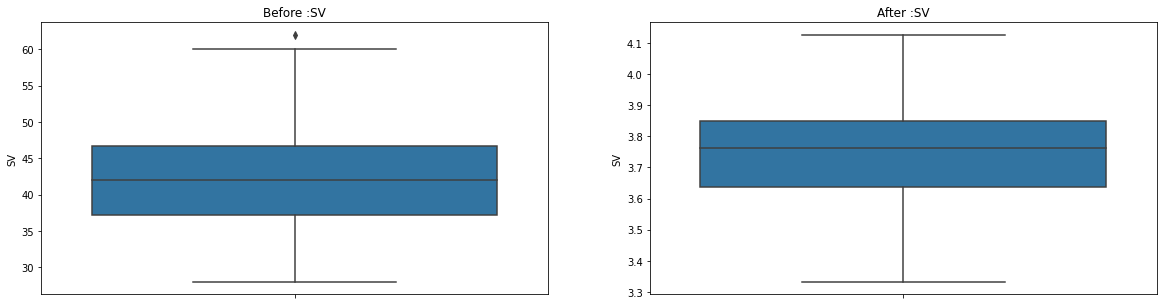

In [43]:
outliers(col = 'SV')

There are some outliers are still present in the Save and Shutout

#### Tranforming data

raw data without any processing

In [44]:
x = df_no_out.drop(['W'],axis = 1)
y = df_no_out.iloc[:,:1]

In [45]:
lr = LinearRegression()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
pt = PowerTransformer(method='yeo-johnson')
pt.fit(x_train)

x_train_tran = pt.fit_transform(x_train)
x_test_tran = pt.fit_transform(x_test)


x_train_tran.shape

(23, 16)

In [47]:
lr.fit(x_train_tran, y_train)

y_pred = lr.predict(x_test_tran)
 
r2_score(y_test, y_pred)

-1.2508229366924142

In [ ]:
y.shape

(29, 1)

##### split


In [48]:
x = df_no_out.drop(['W'],axis = 1)
y = df_no_out.iloc[:,0]

max_acc = 0

for i in range(0,1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  lr = LinearRegression()

  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  r2_score(y_test, y_pred)
  
  if r2_score(y_test, y_pred) > max_acc:
    max_acc = r2_score(y_test, y_pred)
    print('Random State: ',i,'\nBest Accuracy: ',max_acc)
  




Random State:  0 
Best Accuracy:  0.49094130414345416
Random State:  1 
Best Accuracy:  0.7643968940801293
Random State:  3 
Best Accuracy:  0.8888553597670051
Random State:  104 
Best Accuracy:  0.9118774736618407
Random State:  106 
Best Accuracy:  0.9646645956074844


In [ ]:
df_no_out.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.075036
H     -0.018360
CG     0.030986
SO     0.156469
HR     0.264849
2B     0.384886
R      0.399870
BB     0.447513
SHO    0.497526
SV     0.756870
W      1.000000
Name: W, dtype: float64

In [ ]:
df_no_out.skew()

W      0.119013
R     -0.388698
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR    -0.100335
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.050480
SHO    0.526943
SV     0.096752
E      0.583308
dtype: float64

## Standard Scaler

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
scaler = StandardScaler()

In [52]:
#fit the scaler to the train set
scaler.fit(x_train)

#Transforming Train & Test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

NameError: ignored

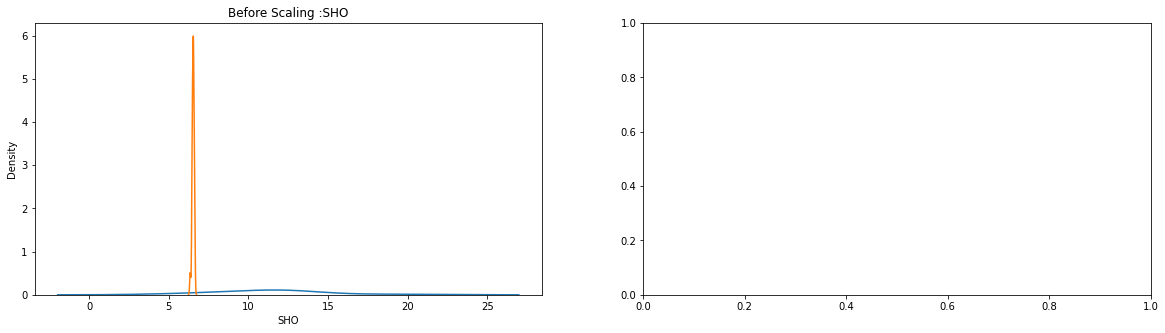

In [53]:
col = 'SHO'
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(x =x_train[col])
sns.kdeplot(x =x_train['R'])

plt.title('Before Scaling :'+col)

plt.subplot(1,2,2)
sns.kdeplot(x =x_train_MMscaled[col])
sns.kdeplot(x =x_train_MMscaled['SV'])
plt.title('After Scaling :'+col)
plt.show()

In [ ]:

max_acc = 0
for i in range(0,1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  x = df_no_out.drop(['W'],axis = 1) #,'E','H'
  y = df_no_out.iloc[:,0]

  lr = LinearRegression()

  #fit the scaler to the train set
  scaler.fit(x_train)

  #Transforming Train & Test sets
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  lr.fit(x_train_scaled, y_train)
  y_pred = lr.predict(x_test_scaled)
  r2_score(y_test, y_pred)
  
  if r2_score(y_test, y_pred) > max_acc:
    max_acc = r2_score(y_test, y_pred)
    print('Random State: ',i,'\nBest Accuracy: ',max_acc)
  

Random State:  0 
Best Accuracy:  0.49094130414344583
Random State:  1 
Best Accuracy:  0.7643968940801321
Random State:  3 
Best Accuracy:  0.8888553597670046
Random State:  104 
Best Accuracy:  0.9118774736618362
Random State:  106 
Best Accuracy:  0.9646645956074881


#### Min Max Scaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

x = df_no_out.drop(['W'],axis = 1) #,'E','H'
y = df_no_out.iloc[:,0]


max_acc = 0
for i in range(0,1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

  MMscaler = MinMaxScaler()

  #fit the scaler to the train set
  MMscaler.fit(x_train)

  #Transforming Train & Test sets

  x_train_MMscaled = MMscaler.transform(x_train)
  x_test_MMscaled = MMscaler.transform(x_test)

  x_train_MMscaled = pd.DataFrame(x_train_MMscaled, columns= x_train.columns)
  x_test_MMscaled = pd.DataFrame(x_test_MMscaled, columns= x_test.columns)

  #-------------------------------------------------------------------------

  lr = LinearRegression()

  lr.fit(x_train_MMscaled, y_train)
  y_pred = lr.predict(x_test_MMscaled)
  r2_score(y_test, y_pred)

  if r2_score(y_test, y_pred) > max_acc:
    max_acc = r2_score(y_test, y_pred)
    print('Random State: ',i,'\nBest Accuracy: ',max_acc,'\nMean Squared Error: ',mean_squared_error(y_test,y_pred),'\nMean absolute Error: ',mean_absolute_error(y_test,y_pred))


Random State:  0 
Best Accuracy:  0.4909413041434403 
Mean Squared Error:  37.44409518411584 
Mean absolute Error:  5.83601680555941
Random State:  1 
Best Accuracy:  0.7643968940801293 
Mean Squared Error:  32.905900460141936 
Mean absolute Error:  5.311920150760507
Random State:  3 
Best Accuracy:  0.8888553597670049 
Mean Squared Error:  19.067480502193817 
Mean absolute Error:  3.3830314726628026
Random State:  104 
Best Accuracy:  0.9118774736618342 
Mean Squared Error:  10.978598072963145 
Mean absolute Error:  2.2994749315522127
Random State:  106 
Best Accuracy:  0.9646645956074873 
Mean Squared Error:  5.912791001680468 
Mean absolute Error:  2.236097810273113


Using different models

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=106)
MMscaler = MinMaxScaler()

#Models we will use.
lr = LinearRegression()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()
sv = SVR()

x = df_no_out.drop(['W'],axis = 1) #,'E','H'
y = df_no_out.iloc[:,0]


def regresion_model(model):
  #fit the scaler to the train set
  MMscaler.fit(x_train)
  #Transforming Train & Test sets
  x_train_MMscaled = MMscaler.transform(x_train)
  x_test_MMscaled = MMscaler.transform(x_test)

  model.fit(x_train_MMscaled, y_train)
  y_pred = model.predict(x_test_MMscaled)

  print(r2_score(y_test, y_pred))
  print(cross_val_score(model, x, y, cv=10).mean())


regresion_model(model = lr)

0.9646645956074873
-2.4461904948595383


In [206]:
regresion_model(model = dt)

0.5348605577689243
-15.197523789950765


In [207]:
regresion_model(model = sv)

0.08218417020137492
-6.805430742963658


In [208]:
regresion_model(model = rfr)

0.649899003984064
-6.169801859418834


Among all of these **Linear Regression**, Decision Tree, RainForestRegressor, Support Vector Regressor</br>Linear model giving the best accuracy scores 96%



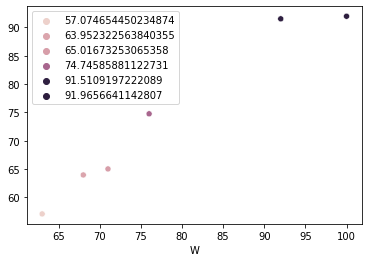

In [72]:
x_train_MMscaled = pd.DataFrame(x_train_MMscaled, columns= x_train.columns)
x_test_MMscaled = pd.DataFrame(x_test_MMscaled, columns= x_test.columns)
# 
sns.scatterplot(x=y_test, y=y_pred, hue= y_pred)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(x_train_MMscaled, y_train)
print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.3893201386178962
Best score: {'alpha': 1}
Best score: Ridge(alpha=1)


In [75]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(lr, 'baseball.obj')
pickle.dump(lr,open('baseball.pkl','wb'))